# To segment customers into the clusters using the clustering algorithms (such as KMeans )based on consumption behaviors and create a machine learning model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import MinMaxScaler
np.random.seed(seed=1)

In [ ]:
df_original = pd.read_csv('/content/CC GENERAL (1).csv', index_col='CUST_ID')
df = df_original.copy()

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Analyze the data using exploratory data analysis technique

To get the statistical summary of the data.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Checking for null values

In [ ]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Replacing the null values

In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df['CREDIT_LIMIT'].count()
df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [ ]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [ ]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Scaling

We used MinMaxScaler to scale the data. It transforms features by scaling each feature to a given range.The default range is zero to one.

In [ ]:
scaler=MinMaxScaler()
normalized_df=scaler.fit_transform(df)

In [ ]:
normalized_df = pd.DataFrame(data=normalized_df,columns=df.columns)

In [ ]:
normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.082154,0.109306,0.0,0.006736,0.045864,0.107868,1.0
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8950.0,0.020457,0.043570,0.0,0.000808,0.007367,0.022637,1.0
ONEOFF_PURCHASES,8950.0,0.014534,0.040722,0.0,0.000000,0.000932,0.014166,1.0
INSTALLMENTS_PURCHASES,8950.0,0.018270,0.040193,0.0,0.000000,0.003956,0.020828,1.0
CASH_ADVANCE,8950.0,0.020766,0.044491,0.0,0.000000,0.000000,0.023629,1.0
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.090096,0.133414,0.0,0.000000,0.000000,0.148148,1.0


In [ ]:
normalized_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


In [ ]:
normalized_df = pd.DataFrame(data=normalized_df)

In [ ]:
normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.082154,0.109306,0.0,0.006736,0.045864,0.107868,1.0
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8950.0,0.020457,0.043570,0.0,0.000808,0.007367,0.022637,1.0
ONEOFF_PURCHASES,8950.0,0.014534,0.040722,0.0,0.000000,0.000932,0.014166,1.0
INSTALLMENTS_PURCHASES,8950.0,0.018270,0.040193,0.0,0.000000,0.003956,0.020828,1.0
CASH_ADVANCE,8950.0,0.020766,0.044491,0.0,0.000000,0.000000,0.023629,1.0
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.090096,0.133414,0.0,0.000000,0.000000,0.148148,1.0


We used heatmap to find correlation between the variables.

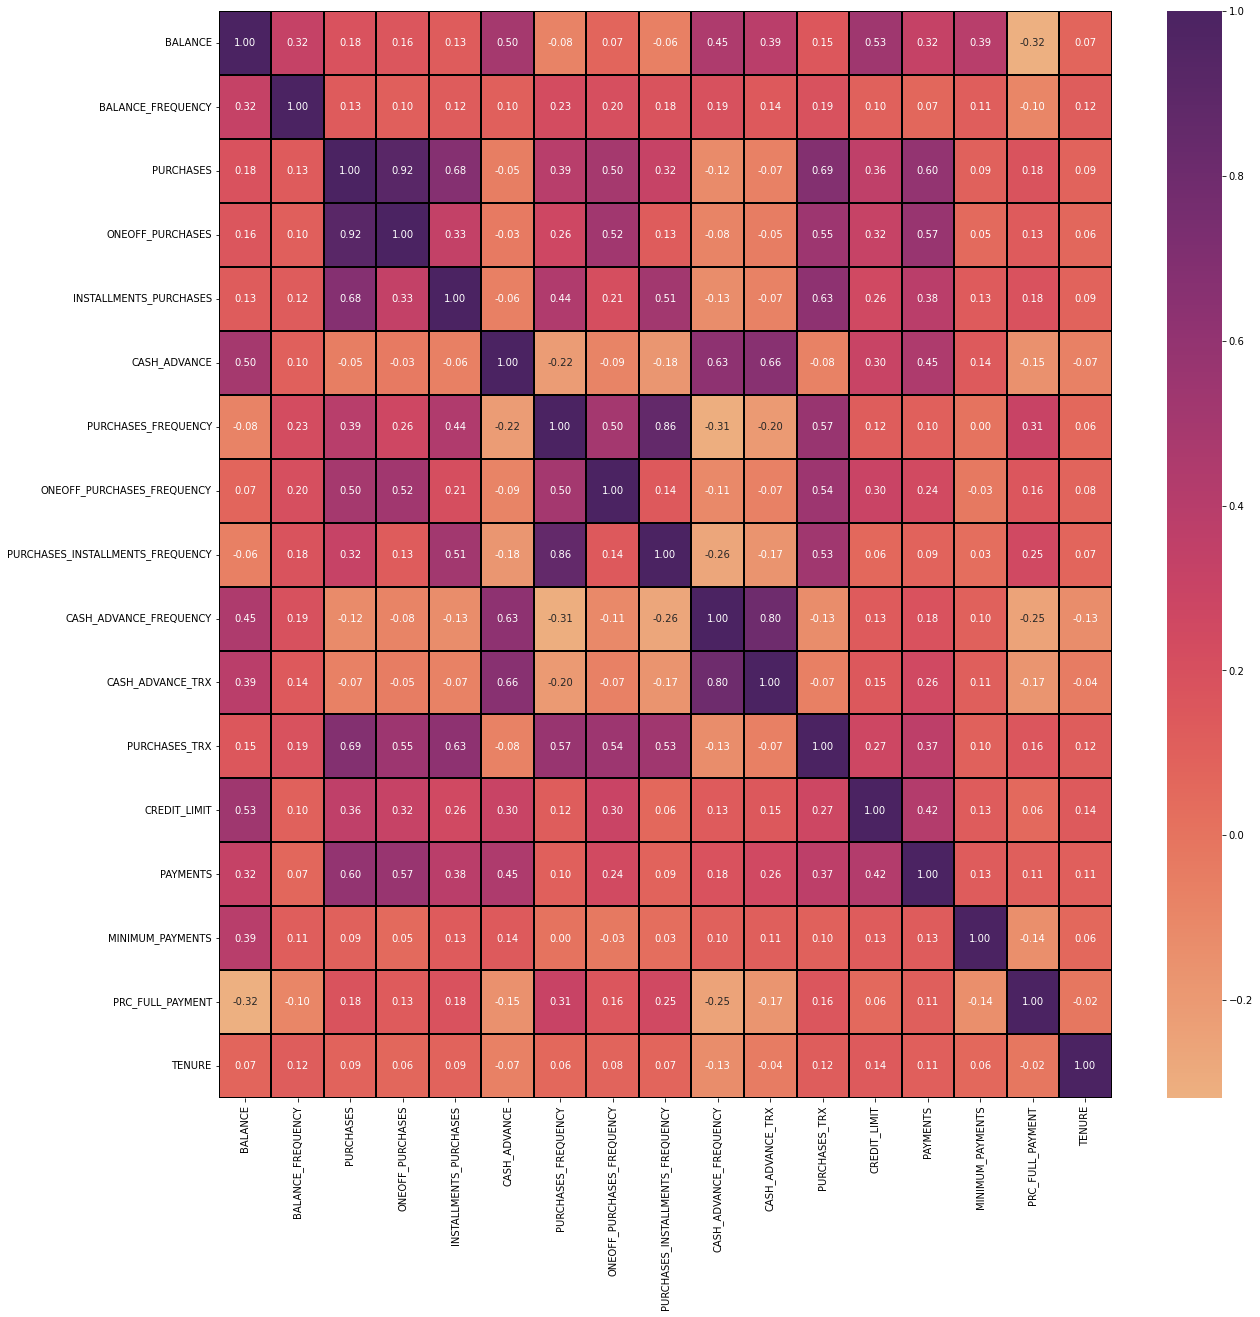

In [ ]:
plt.subplots(figsize=(20, 20))
sns.heatmap(normalized_df.corr(),
            cmap="flare",
            annot=True,
            fmt='.2f',
            linewidths=1,
            linecolor="black")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

We used elbow method to estimate the ideal number of clusters.

Text(0, 0.5, 'Scores')

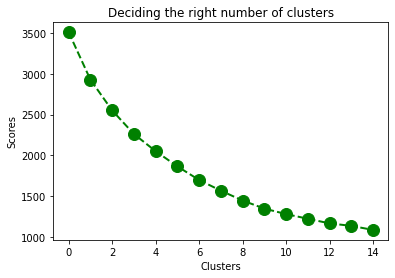

In [ ]:
SSE_values = []
for i in range(2, 17):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=500)
    kmeans.fit(normalized_df)
    SSE_values.append(kmeans.inertia_)
plt.plot(SSE_values,
         color='green',
         marker='o',
         linestyle='dashed',
         linewidth=2,
         markersize=12)
plt.title('Deciding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')

# Clustering on the original dataset

score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:
a: The mean distance between a sample and all other points in the same class.
b: The mean distance between a sample and all other points in the next nearest cluster. s=(b-a)/max(a,b)
The Davies-Bouldin score.
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

In [ ]:
wcss1 = []
sil_kmeans_initial = []
sil_agc_initial = []
sil_birch_initial = []
dav_kmeans_initial = []
dav_agc_initial = []
dav_birch_initial = []
for i in range(3,9):
    
    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(normalized_df)
    
     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss1.append(in_km)
    sil_km_initial = silhouette_score(normalized_df, kmeans.labels_)
    sil_kmeans_initial.append(sil_km_initial)
    dav_km_initial = davies_bouldin_score(normalized_df, kmeans.labels_)
    dav_kmeans_initial.append(dav_km_initial)
    
    # Agglomerative Clusters and its Silhouette Score
    agc = AgglomerativeClustering(n_clusters = i, affinity = 'cityblock', linkage = 'average')
    agc.fit(normalized_df)
    sil_ag_initial = silhouette_score(normalized_df, agc.labels_)
    sil_agc_initial.append(sil_ag_initial)
    dav_ag_initial = davies_bouldin_score(normalized_df, agc.labels_)
    dav_agc_initial.append(dav_ag_initial)
    # Birch Clusters and its Silhouette Score
    bh = Birch(n_clusters = i)
    bh.fit(normalized_df)
    sil_bh_initial = silhouette_score(normalized_df, bh.labels_)
    sil_birch_initial.append(sil_bh_initial)
    dav_bh_initial = davies_bouldin_score(normalized_df, bh.labels_)
    dav_birch_initial.append(dav_bh_initial)
    
    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km_initial)
    print('Silhouette Score for AGC(HCA):', sil_ag_initial)
    print('Silhouette Score for Birch:', sil_bh_initial)
    print('Davies_bouldin Score for KMeans:', dav_km_initial)
    print('Davies_bouldin Score for AGC(HCA):', dav_ag_initial)
    print('Davies_bouldin Score for Birch:', dav_bh_initial)
    print()

Number of clusters: 3
KMeans Inertia 2927.5874078863267
Silhouette Score for KMeans: 0.3723536309287916
Silhouette Score for AGC(HCA): 0.3602165883471694
Silhouette Score for Birch: 0.28030490580268747
Davies_bouldin Score for KMeans: 1.321573539178668
Davies_bouldin Score for AGC(HCA): 1.0268743732230543
Davies_bouldin Score for Birch: 1.8153823586348754

Number of clusters: 4
KMeans Inertia 2551.633774928168
Silhouette Score for KMeans: 0.32150812793160477
Silhouette Score for AGC(HCA): 0.28774862618336383
Silhouette Score for Birch: 0.27646829819981605
Davies_bouldin Score for KMeans: 1.4236052269409103
Davies_bouldin Score for AGC(HCA): 1.0766008611472073
Davies_bouldin Score for Birch: 1.601820149932039

Number of clusters: 5
KMeans Inertia 2262.7196716337726
Silhouette Score for KMeans: 0.3191549723790719
Silhouette Score for AGC(HCA): 0.25606711695026346
Silhouette Score for Birch: 0.2907316101534565
Davies_bouldin Score for KMeans: 1.3035160093911997
Davies_bouldin Score for AG

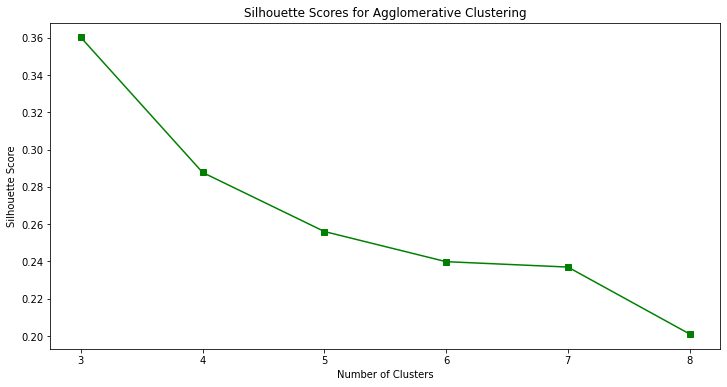

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), sil_agc_initial, marker='s', c='g')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

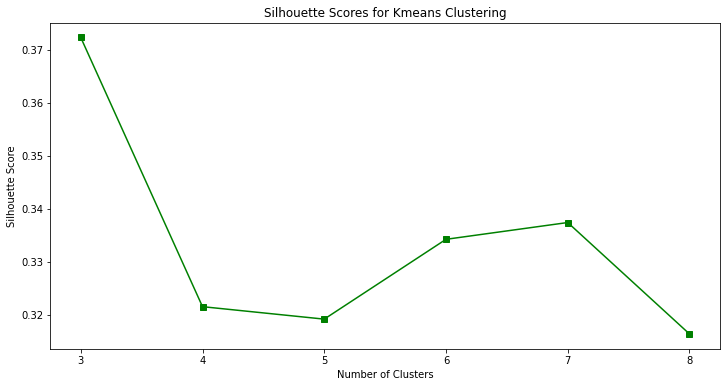

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), sil_kmeans_initial, marker='s', c='g')
plt.title('Silhouette Scores for Kmeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

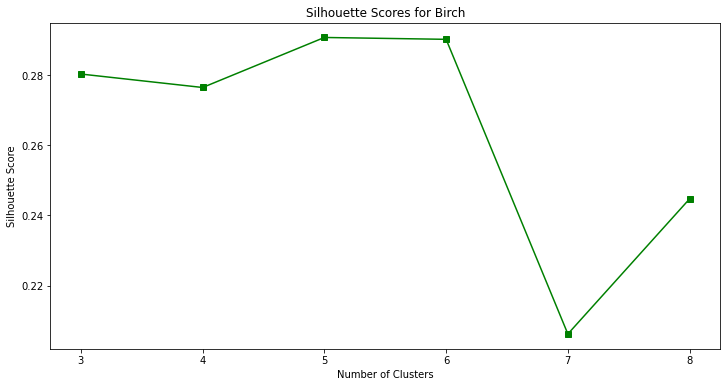

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), sil_birch_initial, marker='s', c='g')
plt.title('Silhouette Scores for Birch')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

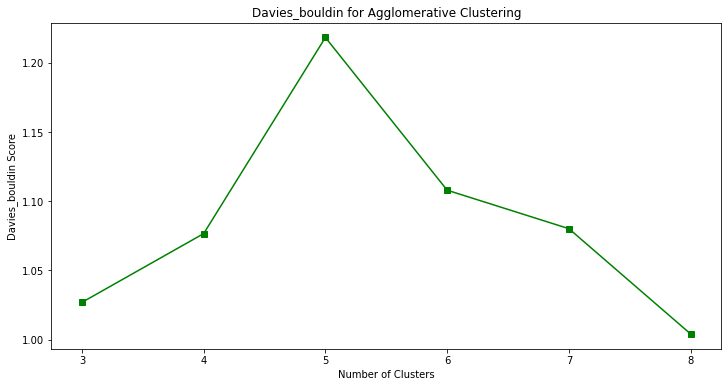

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), dav_agc_initial, marker='s', c='g')
plt.title('Davies_bouldin for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies_bouldin Score')
plt.show()

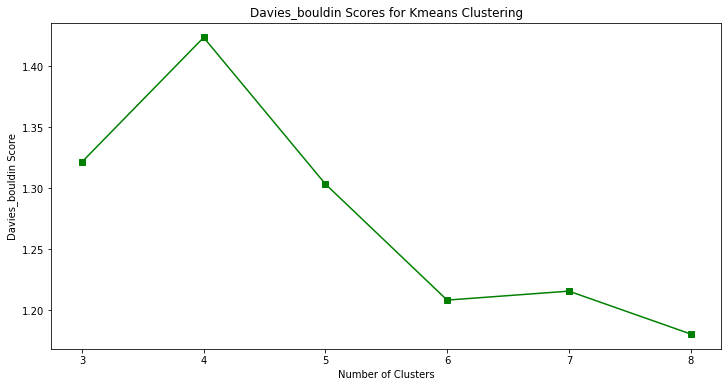

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), dav_kmeans_initial, marker='s', c='g')
plt.title('Davies_bouldin Scores for Kmeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies_bouldin Score')
plt.show()

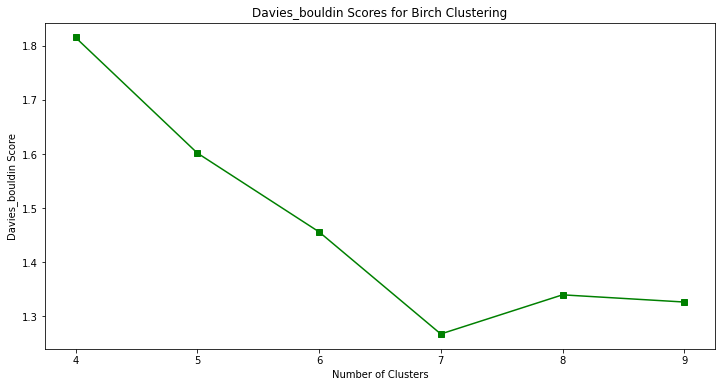

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(4,10), dav_birch_initial, marker='s', c='g')
plt.title('Davies_bouldin Scores for Birch Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies_bouldin Score')
plt.show()

# Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components='mle', svd_solver='full',whiten=True)
pca_model = pca_model.fit(normalized_df)

In [ ]:
pca_model.explained_variance_

array([0.3289522 , 0.09321351, 0.08519069, 0.05091537, 0.04618462,
       0.02380039, 0.01206603, 0.00897302, 0.00434734, 0.00365399,
       0.00188452, 0.00123255, 0.00084074, 0.00081306, 0.00070121,
       0.00047794])

Cumulative variance.
- The amount of variance explained by each of the selected components.

In [ ]:
Cum_var = np.cumsum(
    np.round(pca_model.explained_variance_ratio_, decimals=4) * 100)
print(Cum_var)

[ 49.6   63.65  76.49  84.17  91.13  94.72  96.54  97.89  98.55  99.1
  99.38  99.57  99.7   99.82  99.93 100.  ]


In [ ]:
pd.DataFrame(
    {
        'Eigen_value': pca_model.explained_variance_,
        'Cumm_variance': Cum_var
    },
    index=range(1, 17)).round(4).head(16)

,Eigen_value,Cumm_variance
1,0.3290,49.60
2,0.0932,63.65
3,0.0852,76.49
4,0.0509,84.17
5,0.0462,91.13
6,0.0238,94.72
7,0.0121,96.54
8,0.0090,97.89
9,0.0043,98.55
10,0.0037,99.10


## Scree Plot

- The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA).
- The procedure of finding statistically significant factors or components using a scree plot is also known as a scree test.


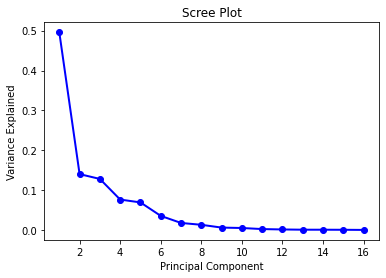

In [ ]:
PC_values = np.arange(pca_model.n_components_) + 1
plt.plot(PC_values, pca_model.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
PCA_4 = PCA(n_components=4)
X_PCA_4 = PCA_4.fit_transform(normalized_df)

In [ ]:
PC = pd.DataFrame(X_PCA_4, columns=['PC1 PC2 PC3 PC4'.split()])
PC

,PC1,PC2,PC3,PC4
0,-0.482166,-0.097654,-0.046458,-0.058340
1,-0.608576,-0.019373,0.082138,-0.218705
2,0.304509,0.920942,0.012071,0.159970
3,-0.588620,-0.005601,0.036897,0.004316
4,-0.554355,0.052970,-0.084175,-0.132848
...,...,...,...,...
8945,0.646919,-0.463065,0.210396,0.613744
8946,0.549891,-0.406722,-0.214555,0.780045
8947,0.360386,-0.422666,0.105913,0.745079
8948,-0.646097,-0.204353,0.281791,0.633184


In [ ]:
list_cols = normalized_df.columns

In [ ]:
PC_with_all_variables = pd.DataFrame(PCA_4.components_.T, columns = ['PC_'+str(i) for i in range(1,5)], index = list_cols)
PC_with_all_variables

,PC_1,PC_2,PC_3,PC_4
BALANCE,-0.015030,0.098794,-0.161166,-0.053797
BALANCE_FREQUENCY,0.101778,0.266258,-0.374169,-0.421180
PURCHASES,0.032821,0.047629,0.010044,-0.001047
ONEOFF_PURCHASES,0.019989,0.058498,0.015007,0.004732
INSTALLMENTS_PURCHASES,0.035333,-0.002200,-0.005296,-0.010860
CASH_ADVANCE,-0.016895,0.013361,-0.026812,-0.005105
PURCHASES_FREQUENCY,0.685500,0.080514,-0.047244,0.147315
ONEOFF_PURCHASES_FREQUENCY,0.242633,0.822776,0.168827,0.192644
PURCHASES_INSTALLMENTS_FREQUENCY,0.637189,-0.423220,-0.225933,-0.013884
CASH_ADVANCE_FREQUENCY,-0.074094,0.055912,-0.123696,0.005038


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from scipy.cluster.hierarchy import dendrogram,linkage

# Clustering on the reduced data

In [ ]:
wcss = []
sil_kmeans = []
sil_agc = []
sil_birch = []
dav_kmeans = []
dav_agc = []
dav_birch = []
for i in range(3,9):
    
    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0,max_iter=500)
    kmeans.fit(X_PCA_4)
    
     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X_PCA_4, kmeans.labels_)
    sil_kmeans.append(sil_km)
    dav_km = davies_bouldin_score(X_PCA_4, kmeans.labels_)
    dav_kmeans.append(dav_km)
    
    # Agglomerative Clusters and its Silhouette Score
    agc = AgglomerativeClustering(n_clusters = i, affinity = 'cityblock', linkage = 'average')
    agc.fit(X_PCA_4)
    sil_ag = silhouette_score(X_PCA_4, agc.labels_)
    sil_agc.append(sil_ag)
    dav_ag = davies_bouldin_score(X_PCA_4, agc.labels_)
    dav_agc.append(dav_ag)
    # Birch Clusters and its Silhouette Score
    bh = Birch(n_clusters = i)
    bh.fit(X_PCA_4)
    sil_bh = silhouette_score(X_PCA_4, bh.labels_)
    sil_birch.append(sil_bh)
    dav_bh = davies_bouldin_score(X_PCA_4, bh.labels_)
    dav_birch.append(dav_bh)
    
    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print('Silhouette Score for AGC(HCA):', sil_ag)
    print('Silhouette Score for Birch:', sil_bh)
    print('Davies_bouldin Score for KMeans:', dav_km)
    print('Davies_bouldin Score for AGC(HCA):', dav_ag)
    print('Davies_bouldin Score for AGC(HCA):', dav_bh)
    print()

Number of clusters: 3
KMeans Inertia 1996.0496694001813
Silhouette Score for KMeans: 0.4497683988493951
Silhouette Score for AGC(HCA): 0.2805280528678792
Silhouette Score for Birch: 0.4450281057466178
Davies_bouldin Score for KMeans: 1.1069614986622291
Davies_bouldin Score for AGC(HCA): 0.933936826263481
Davies_bouldin Score for AGC(HCA): 1.090281099384126

Number of clusters: 4
KMeans Inertia 1688.21399119465
Silhouette Score for KMeans: 0.4548481869600515
Silhouette Score for AGC(HCA): 0.4028530668852404
Silhouette Score for Birch: 0.415969384515068
Davies_bouldin Score for KMeans: 1.0327602847180128
Davies_bouldin Score for AGC(HCA): 0.9686585559732745
Davies_bouldin Score for AGC(HCA): 1.1081120998625207

Number of clusters: 5
KMeans Inertia 1423.3932914170032
Silhouette Score for KMeans: 0.38437413647041974
Silhouette Score for AGC(HCA): 0.3993689962291968
Silhouette Score for Birch: 0.41499607106192554
Davies_bouldin Score for KMeans: 1.1229518617181053
Davies_bouldin Score for A

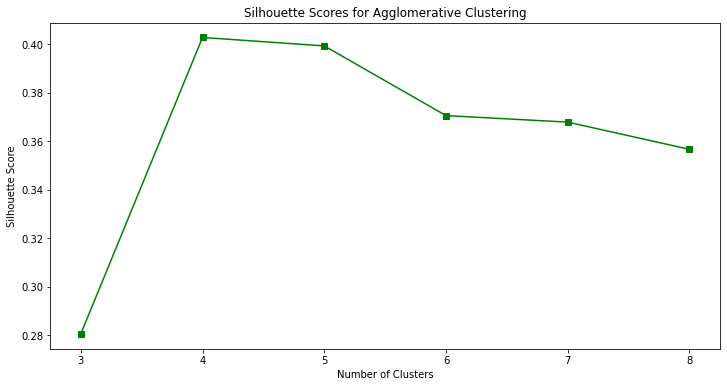

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), sil_agc, marker='s', c='g')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

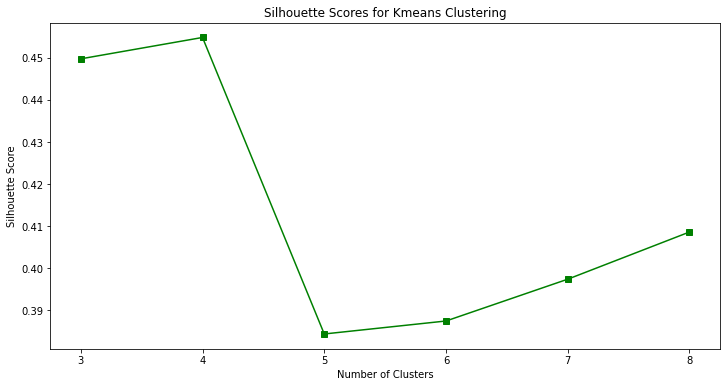

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), sil_kmeans, marker='s', c='g')
plt.title('Silhouette Scores for Kmeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

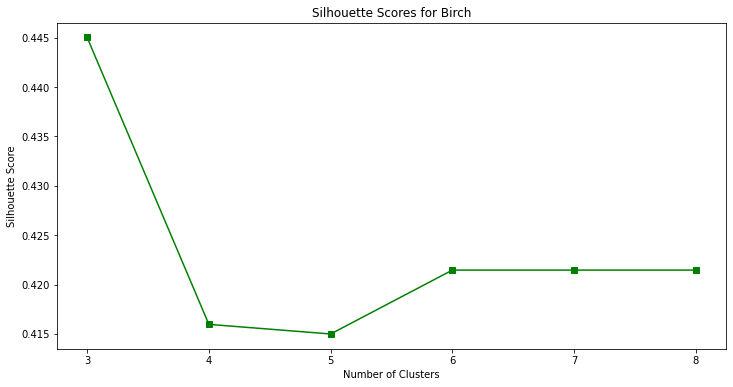

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), sil_birch, marker='s', c='g')
plt.title('Silhouette Scores for Birch')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

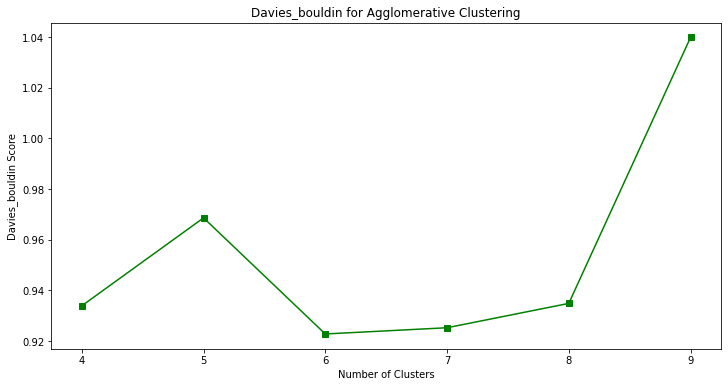

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(4,10), dav_agc, marker='s', c='g')
plt.title('Davies_bouldin for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies_bouldin Score')
plt.show()

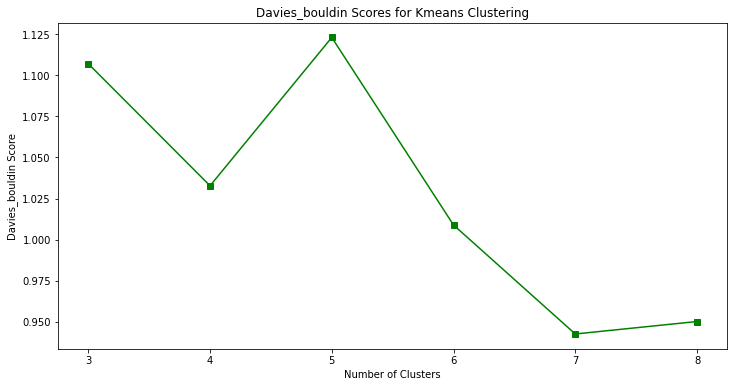

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), dav_kmeans, marker='s', c='g')
plt.title('Davies_bouldin Scores for Kmeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies_bouldin Score')
plt.show()

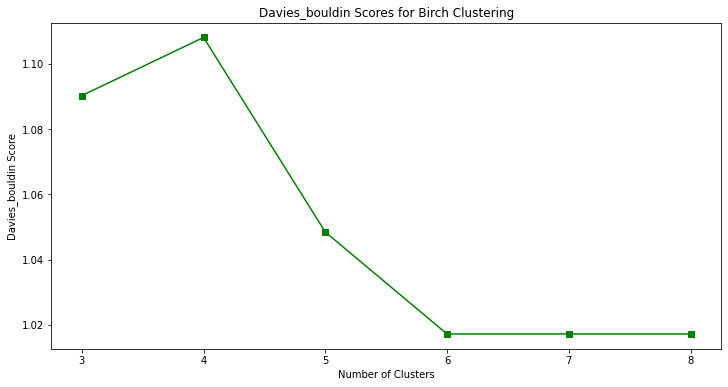

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), dav_birch, marker='s', c='g')
plt.title('Davies_bouldin Scores for Birch Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies_bouldin Score')
plt.show()

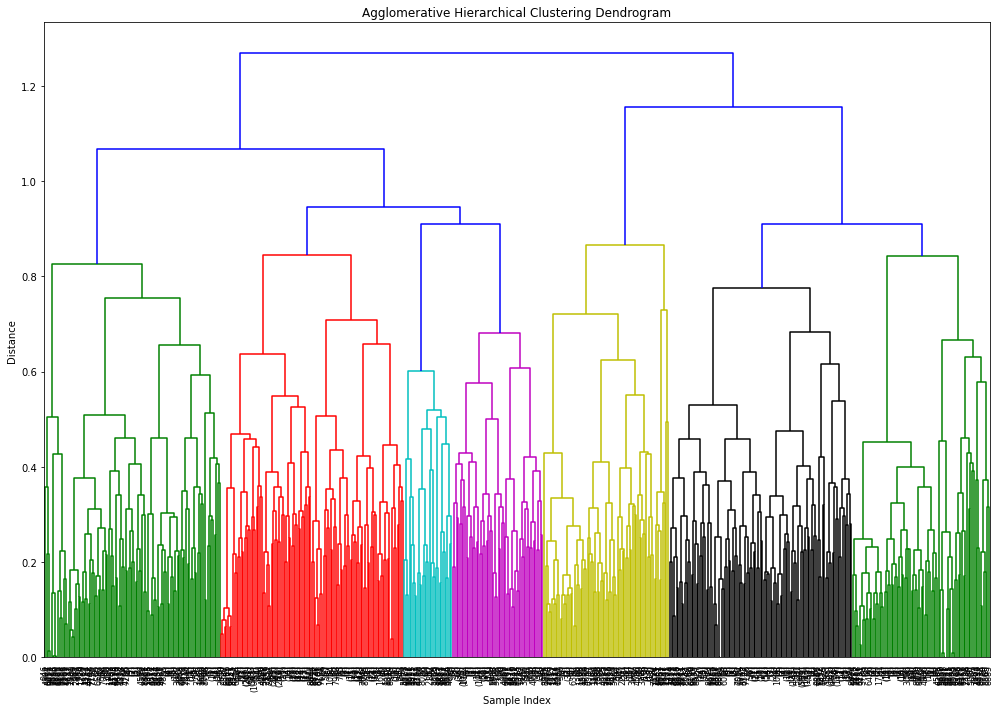

In [ ]:
Z= linkage(X_PCA_4, method = 'average', metric = 'euclidean')
plt.figure(figsize=(14,10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.xticks(rotation=45)
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode='level', p =9)
plt.tight_layout()

# Visualization

Scatter plot for Principal Components 0 and 1


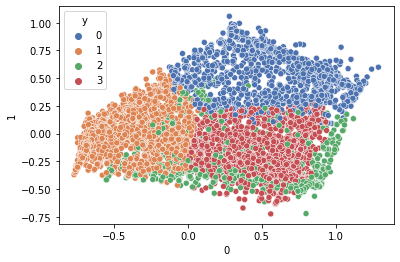

Scatter plot for Principal Components 1 and 2


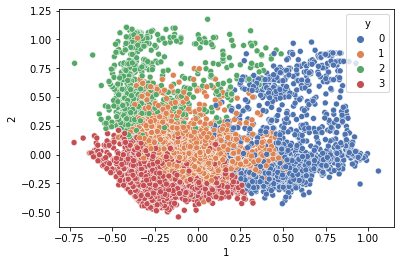

Scatter plot for Principal Components 2 and 3


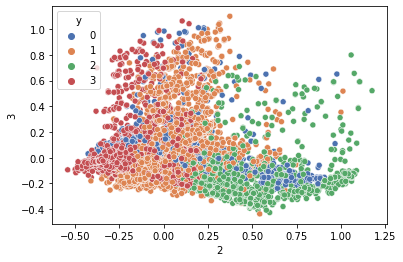

In [ ]:
#K-Means Clusters:   For K= 4
kmeans = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 42,max_iter=500)
kmeans.fit(X_PCA_4)

# Taking into each dataframes
df_pca = pd.DataFrame(X_PCA_4)
y_lab = pd.Series(kmeans.labels_, name = 'y') # labels for clusters

#concatenating the dataframe:
df_final = pd.concat([df_pca, y_lab], axis = 1)

# As there are 7 dimensions, hence we need to plot for each of the different pairs to visualize the spread of the data:

for i in range(3):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(df_pca[i], df_pca[i+1], hue = df_final['y'], palette='deep')
    plt.show()

In [ ]:
kmeans=KMeans(4)
kmeans.fit(X_PCA_4)
km_cluster = kmeans.labels_

In [ ]:
pd.Series(km_cluster).value_counts()

1    4513
0    2238
3    1285
2     914
dtype: int64

In [ ]:
PC.head()


,PC1,PC2,PC3,PC4
0,-0.482166,-0.097654,-0.046458,-0.058340
1,-0.608576,-0.019373,0.082138,-0.218705
2,0.304509,0.920942,0.012071,0.159970
3,-0.588620,-0.005601,0.036897,0.004316
4,-0.554355,0.052970,-0.084175,-0.132848


In [ ]:
PC['Clusters_4'] = km_cluster

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
mnscaler=MinMaxScaler()
normalized_df1=mnscaler.fit_transform(normalized_df)'''

'from sklearn.preprocessing import MinMaxScaler\nmnscaler=MinMaxScaler()\nnormalized_df1=mnscaler.fit_transform(normalized_df)'

In [ ]:
# normalized_df1 = pd.DataFrame(data=normalized_df1)

In [ ]:
normalized_df['Clusters_4'] = km_cluster

In [ ]:
normalized_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters_4
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,1
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,1
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,3
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0,1
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,1


In [ ]:
PC.head()

,PC1,PC2,PC3,PC4,Clusters_4
0,-0.482166,-0.097654,-0.046458,-0.058340,1
1,-0.608576,-0.019373,0.082138,-0.218705,1
2,0.304509,0.920942,0.012071,0.159970,3
3,-0.588620,-0.005601,0.036897,0.004316,1
4,-0.554355,0.052970,-0.084175,-0.132848,1


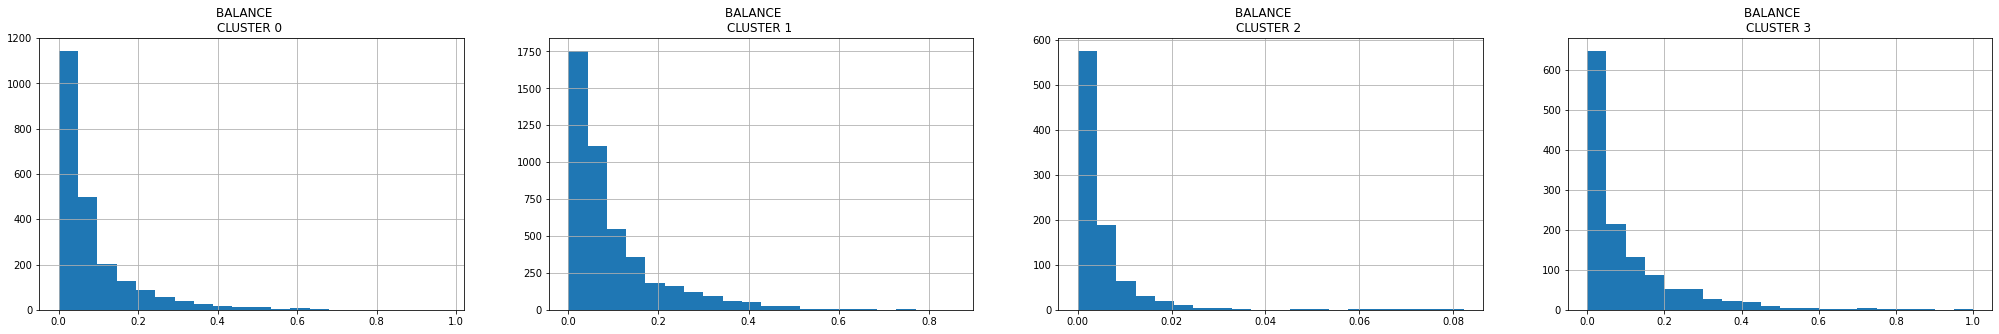

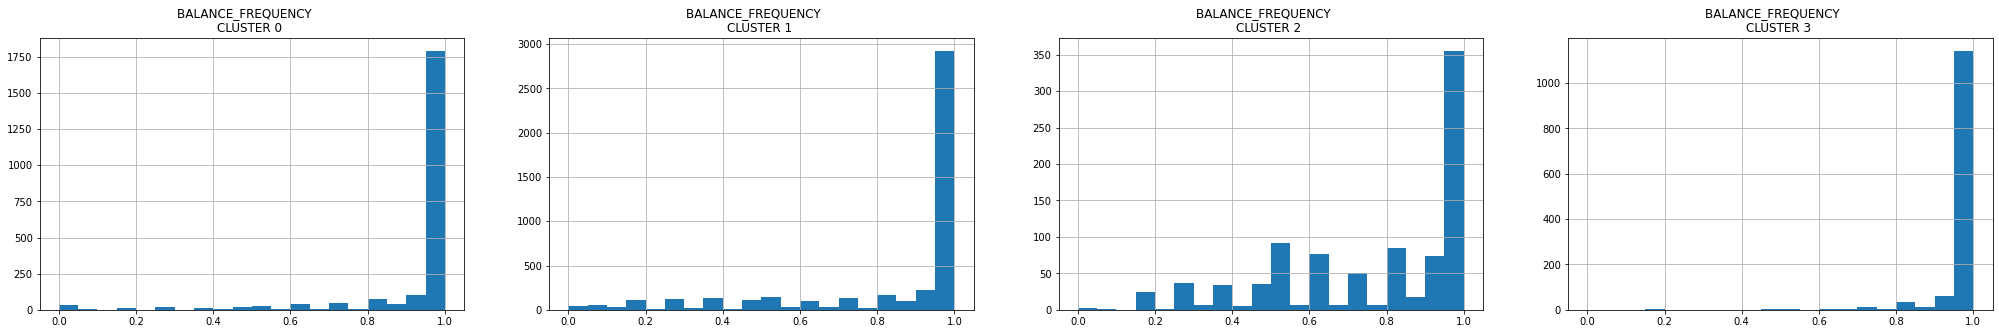

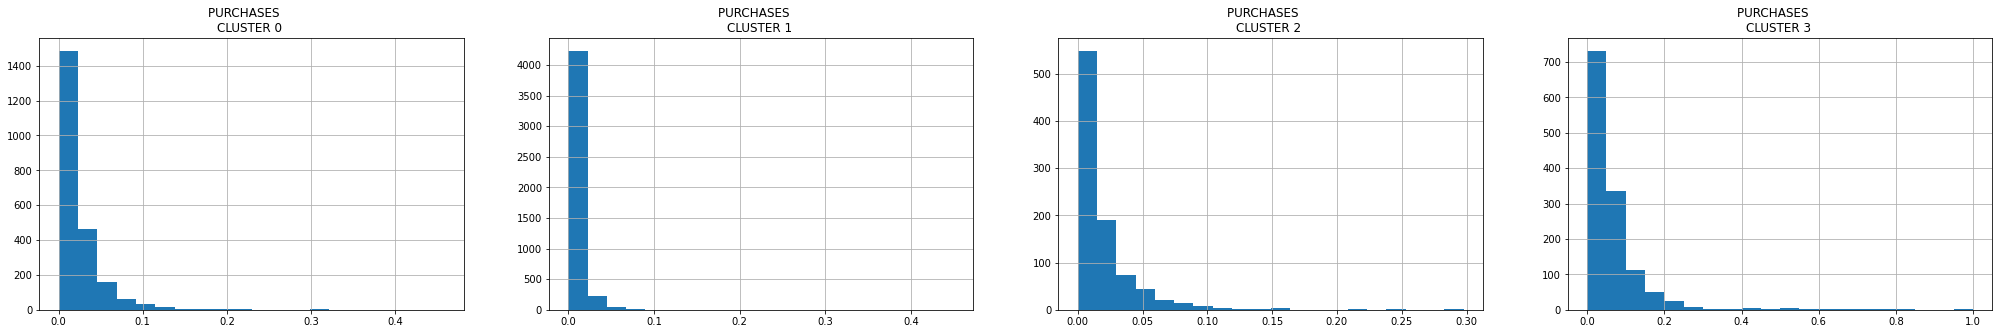

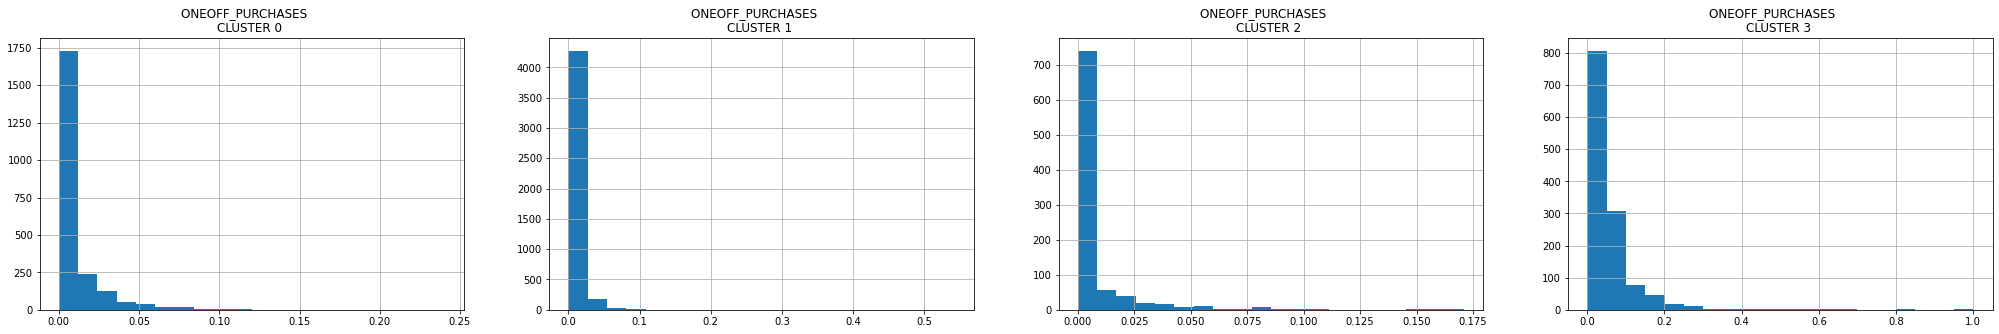

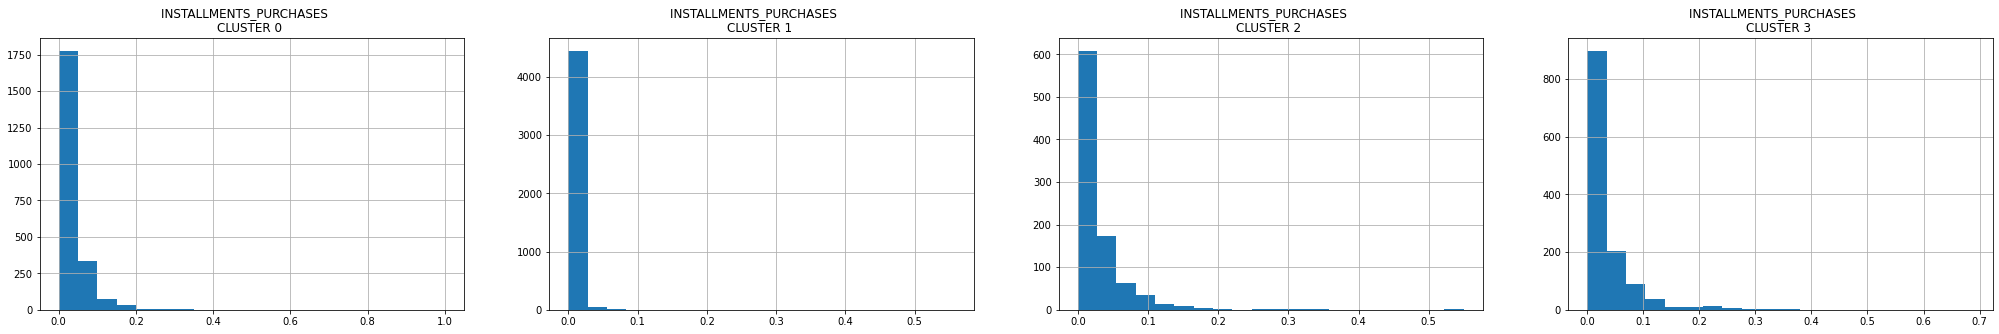

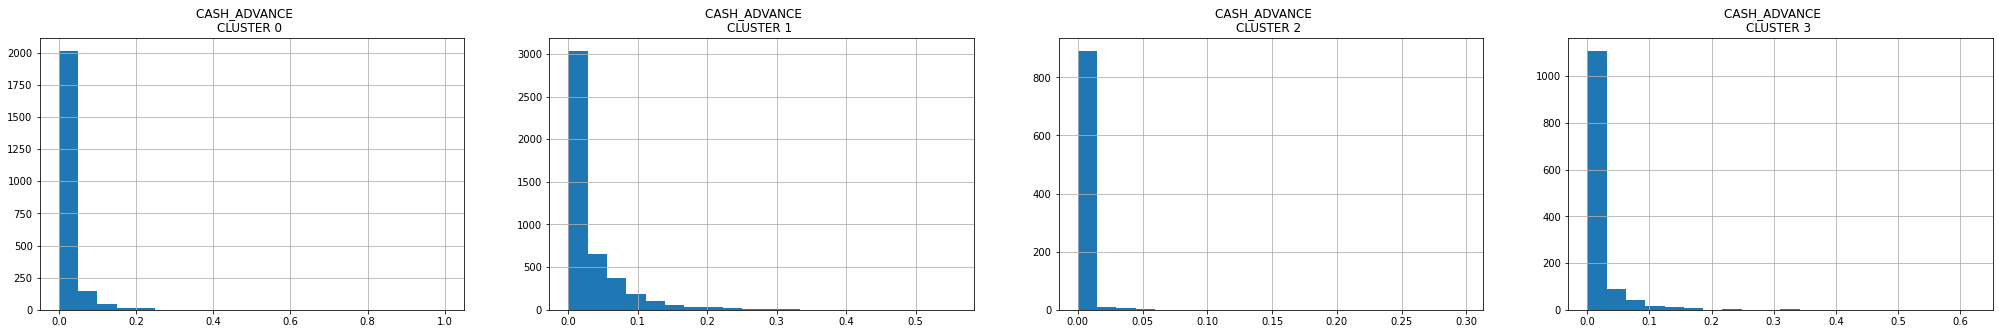

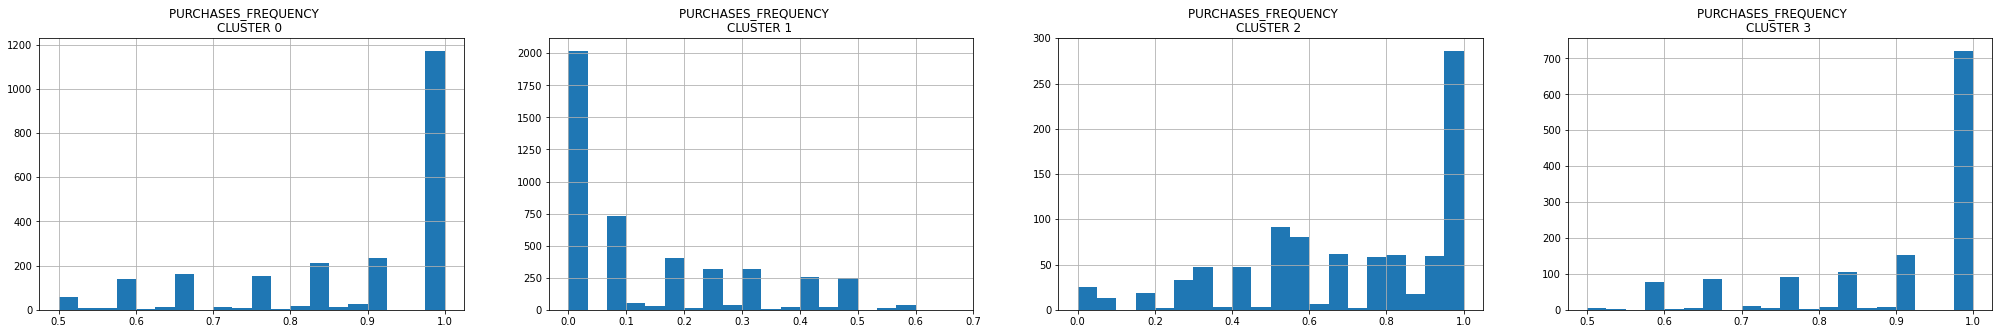

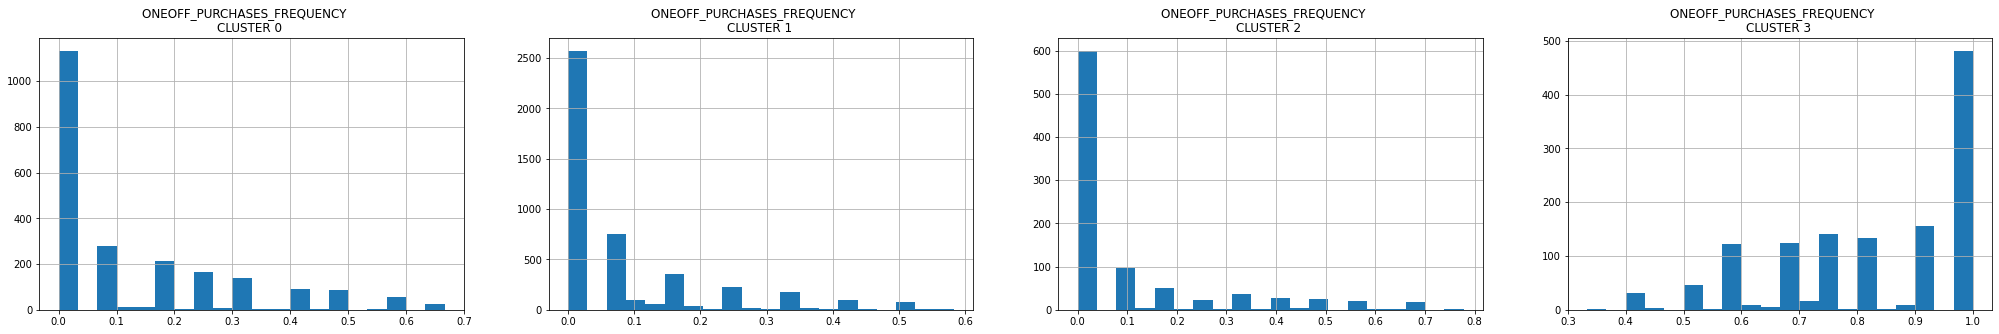

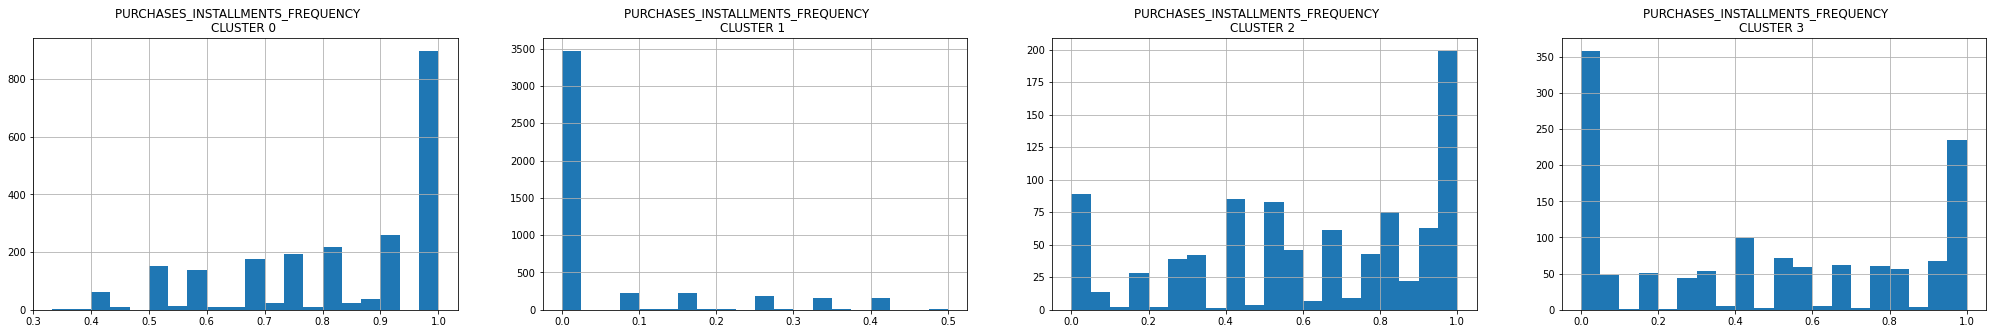

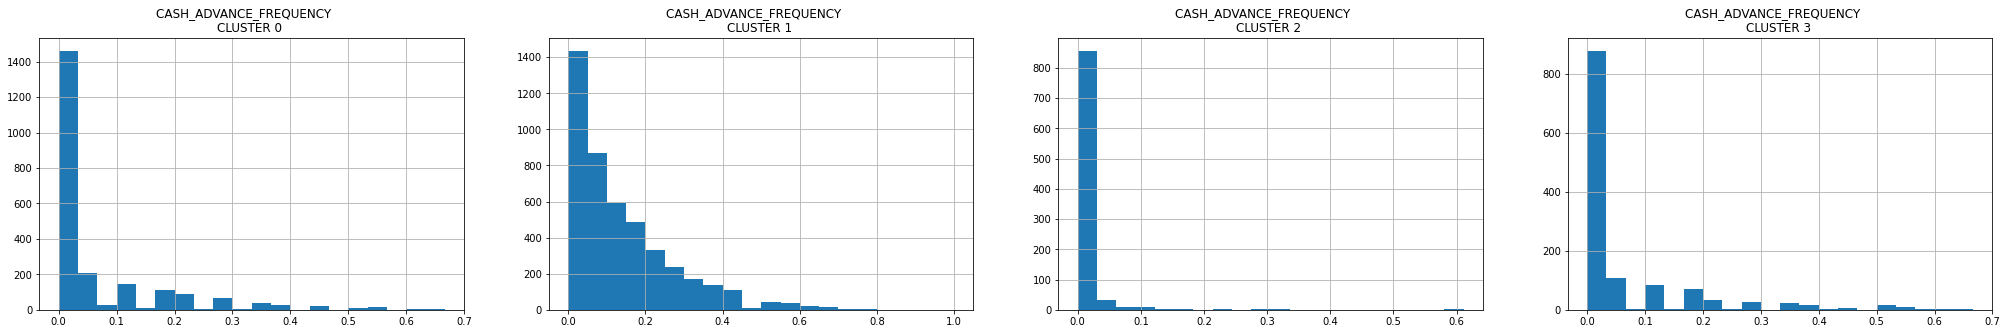

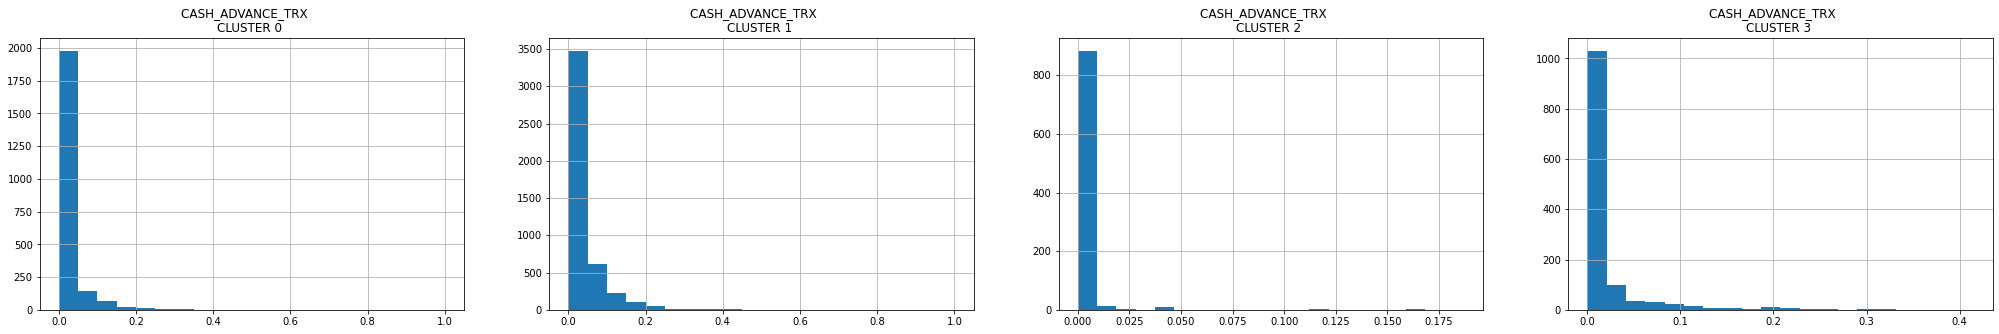

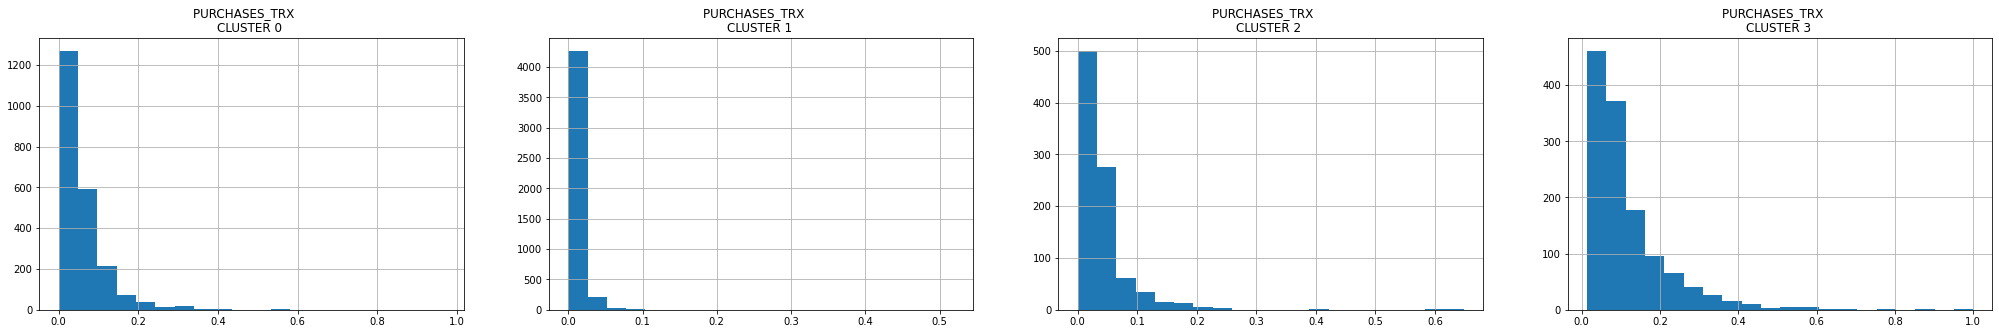

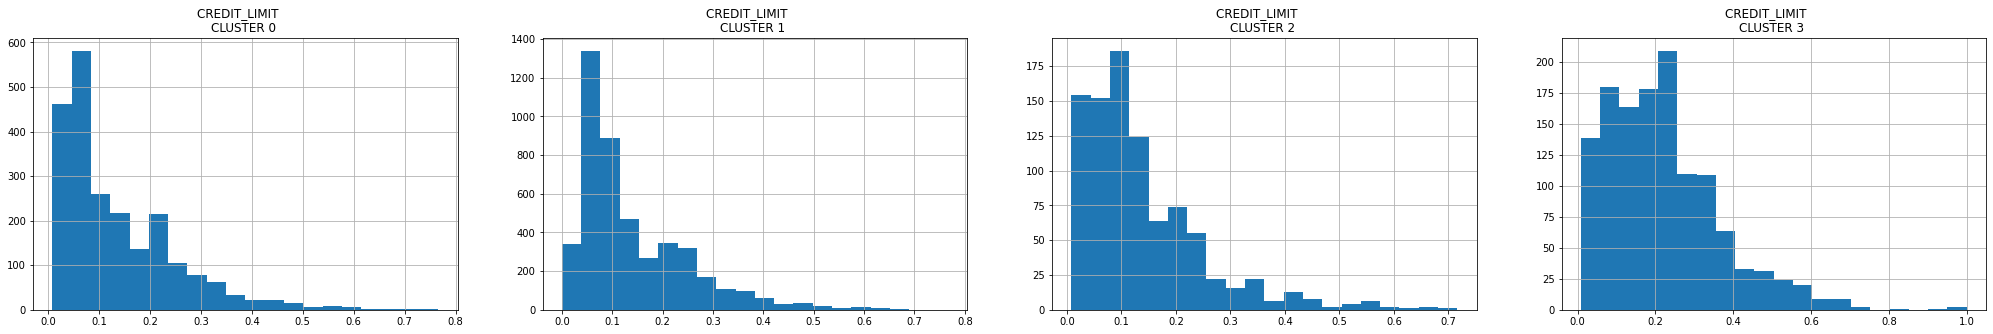

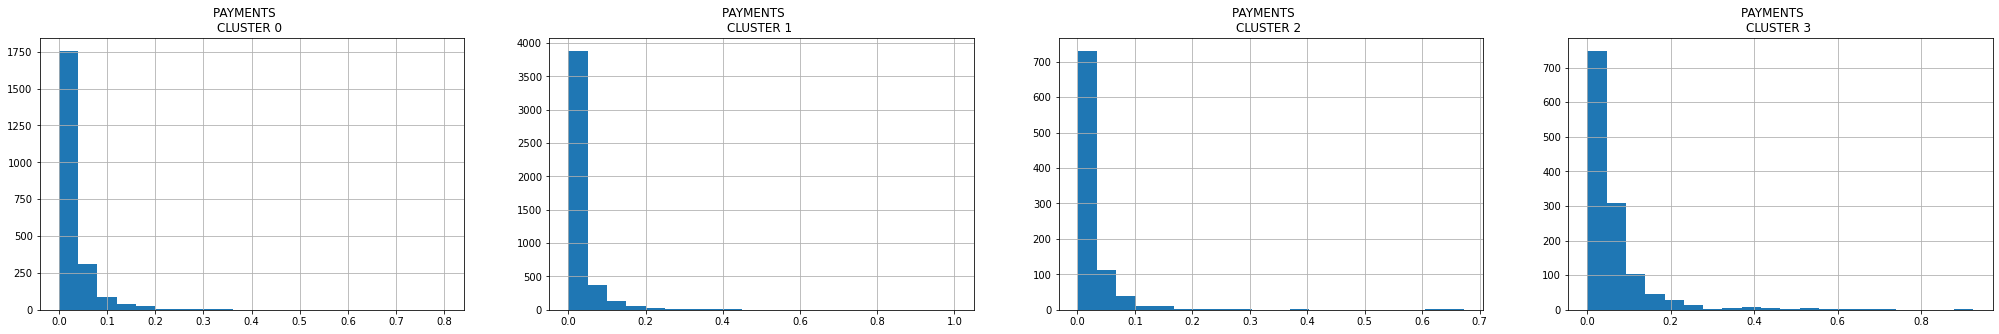

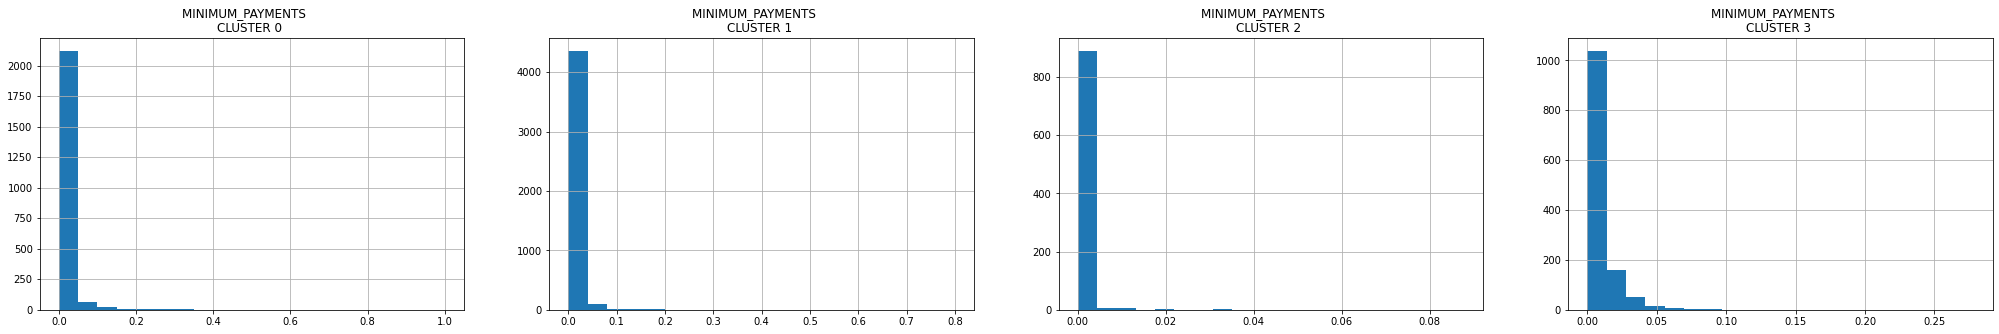

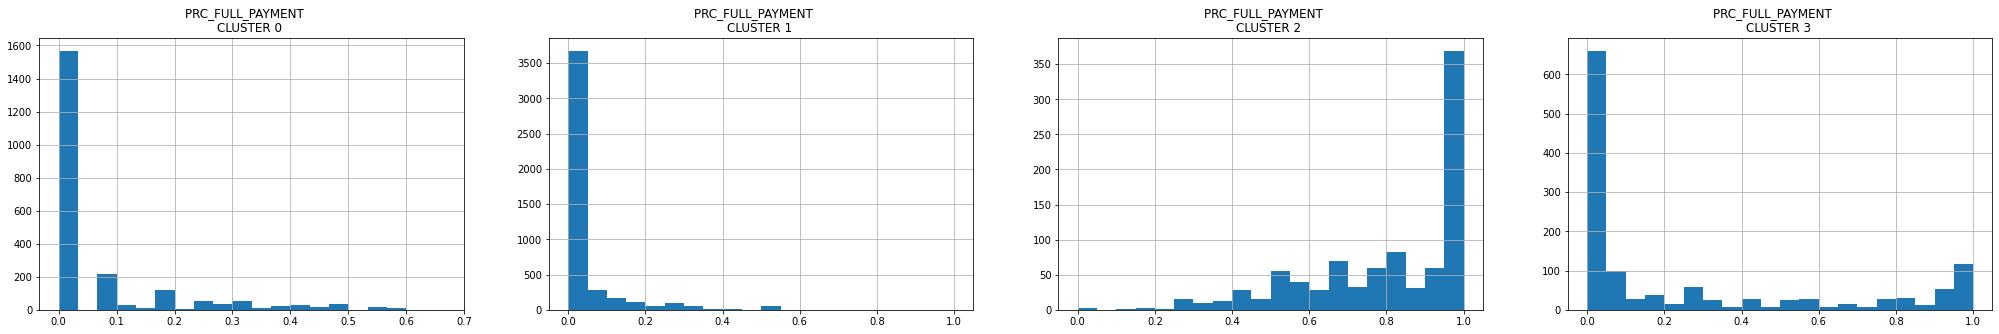

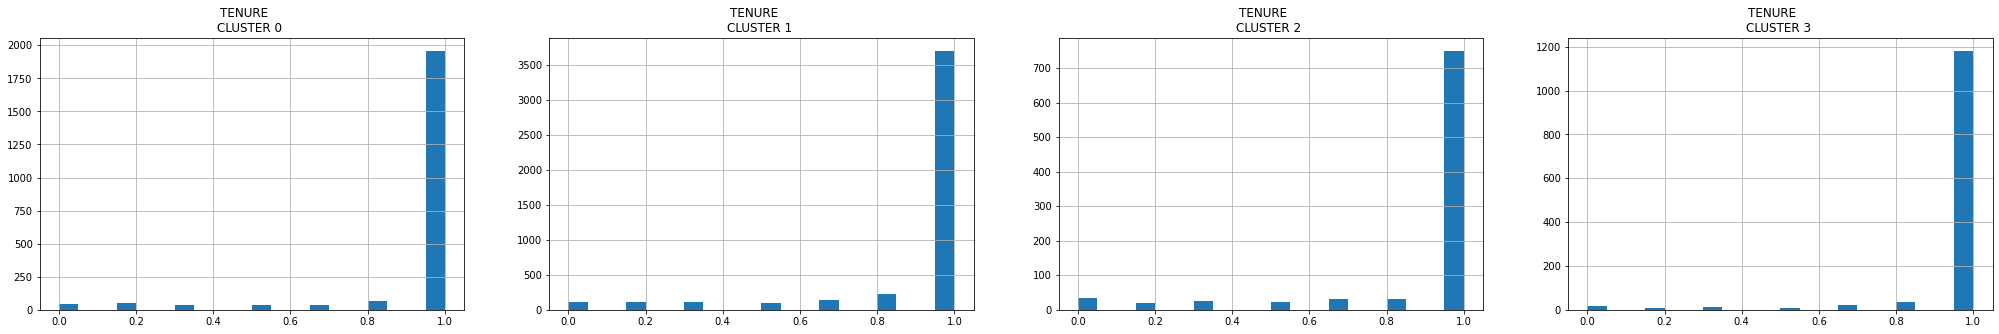

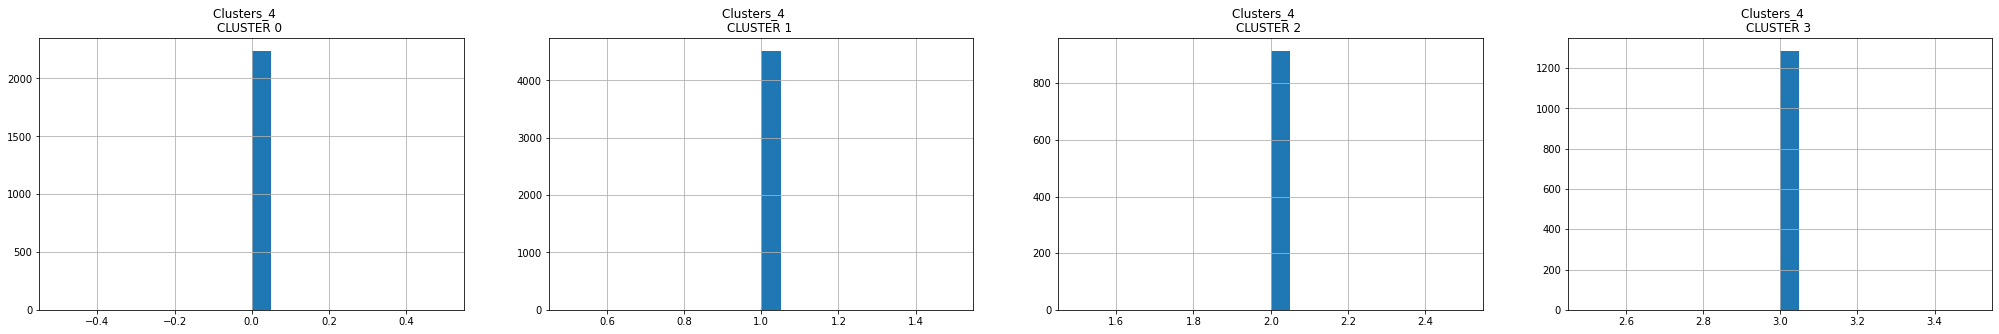

In [ ]:
# Plot the histogram of various clusters
for i in normalized_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = normalized_df[normalized_df['Clusters_4'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCLUSTER {} '.format(i,j))
  
  plt.show()

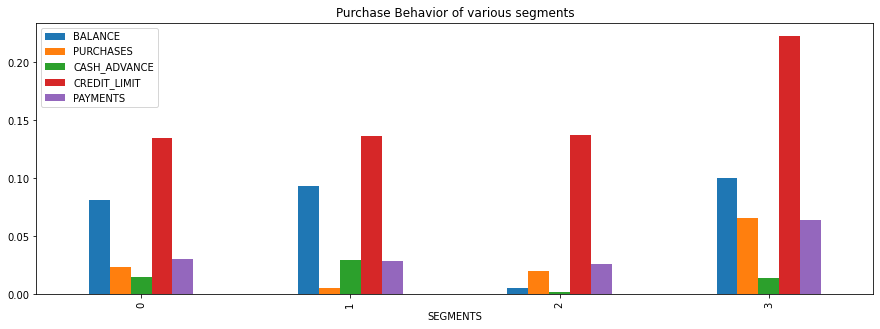

In [ ]:
(normalized_df.iloc[:,[0,2,5,12,13,17]]
 .groupby('Clusters_4').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS')
plt.savefig('Purchase Behavior of various segments.png',format='png')


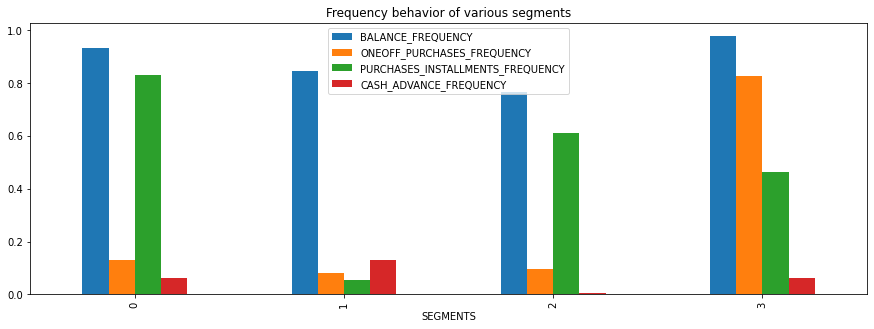

In [ ]:
(normalized_df.iloc[:,[1,7,8,9,17]].groupby('Clusters_4').mean().plot.bar(figsize=(15, 5)))
plt.title('Frequency behavior of various segments')
plt.xlabel('SEGMENTS');
plt.savefig('Frequency behavior of various segments.png',format='png')

- The first customer segment has high purchases installment frequency and high credit limit.
- The second customer segment has high credit limit,balance and balance frequency. However, they don’t do purchases frequntly
- The third customer segment uses credit card frequently.It has high credit limit and lowest cash advance frequency. This customer segment uses credit card for installments.
- The fourth customer segment is very important for business.It has high balance, balance frequency. It has highest one off purchase frequency. It has highest credit limit. This customer segment uses credit card frequently.

 

# Supervised Classification model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
PC.head()

,PC1,PC2,PC3,PC4,Clusters_4
0,-0.482166,-0.097654,-0.046458,-0.058340,1
1,-0.608576,-0.019373,0.082138,-0.218705,1
2,0.304509,0.920942,0.012071,0.159970,3
3,-0.588620,-0.005601,0.036897,0.004316,1
4,-0.554355,0.052970,-0.084175,-0.132848,1


In [ ]:
PC.shape

(8950, 5)

In [ ]:
x = PC.drop("Clusters_4",axis=1).values

In [ ]:
y = PC[['Clusters_4']].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123,stratify=y)

In [ ]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [ ]:
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  scores.append(score)

In [ ]:
df1 = pd.DataFrame()
df1['Names'] = names
df1['Score'] = scores
df1

,Names,Score
0,Nearest Neighbors,0.988827
1,Linear SVM,0.974860
2,Gradient_Boosting,0.989385
3,Decision Tree,0.984916
4,Random Forest,0.963687
5,AdaBoost,0.841341
6,Naive Bayes,0.965922
7,Logistic_Regression,0.992737


In [ ]:
cm = sns.light_palette('Purple',as_cmap=True)
s = df1.style.background_gradient(cmap=cm)
s

,Names,Score
0,Nearest Neighbors,0.988827
1,Linear SVM,0.974860
2,Gradient_Boosting,0.989385
3,Decision Tree,0.984916
4,Random Forest,0.963687
5,AdaBoost,0.841341
6,Naive Bayes,0.965922
7,Logistic_Regression,0.992737


In [ ]:
from sklearn.metrics import classification_report
classifier1 = LogisticRegression()
classifier1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_1 = classifier1.predict(x_test)

In [ ]:
report_1 = classification_report(y_test,y_pred_1)
print(report_1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       447
           1       0.99      1.00      1.00       903
           2       0.97      0.99      0.98       183
           3       1.00      0.99      0.99       257

    accuracy                           0.99      1790
   macro avg       0.99      0.99      0.99      1790
weighted avg       0.99      0.99      0.99      1790



In [ ]:
x = normalized_df.drop('Clusters_4',axis=1).values
y = normalized_df['Clusters_4'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123)
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [ ]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [ ]:
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  scores.append(score)

In [ ]:
df2 = pd.DataFrame()
df2['Names'] = names
df2['Score'] = scores
df2

,Names,Score
0,Nearest Neighbors,0.974302
1,Linear SVM,0.968715
2,Gradient_Boosting,0.984916
3,Decision Tree,0.966480
4,Random Forest,0.901117
5,AdaBoost,0.922346
6,Naive Bayes,0.846927
7,Logistic_Regression,0.992179


In [ ]:
cm = sns.light_palette('Purple',as_cmap=True)
s = df2.style.background_gradient(cmap=cm)
s

,Names,Score
0,Nearest Neighbors,0.974302
1,Linear SVM,0.968715
2,Gradient_Boosting,0.984916
3,Decision Tree,0.966480
4,Random Forest,0.901117
5,AdaBoost,0.922346
6,Naive Bayes,0.846927
7,Logistic_Regression,0.992179


In [ ]:
classifier1 = LogisticRegression()
classifier1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predicted = classifier1.predict(x_test)

In [ ]:
report_2 = classification_report(y_test,y_predicted)
print(report_2)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       445
           1       1.00      1.00      1.00       880
           2       0.99      0.97      0.98       196
           3       0.99      0.99      0.99       269

    accuracy                           0.99      1790
   macro avg       0.99      0.99      0.99      1790
weighted avg       0.99      0.99      0.99      1790



# Conclusion

- We segmented customers into four different and identified characteristics of each segment and we created a supervised classification model 
